# continous data

In [1]:
# loading EEG/MEG data

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import mne

In [3]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


In [4]:
raw.crop(tmax = 60)

<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~3.3 MB, data not loaded>

In [7]:
n_time_samps = raw.n_times
time_secs = raw.times
ch_names = raw.ch_names
n_chan = len(ch_names)  # note: there is no raw.n_channels attribute
print('the (cropped) sample data object has {} time samples and {} channels.'
      ''.format(n_time_samps, n_chan))
print('The last time sample is at {} seconds.'.format(time_secs[-1]))
print('The first few channel names are {}.'.format(', '.join(ch_names[:3])))
print()  # insert a blank line in the output

# some examples of raw.info:
print('bad channels:', raw.info['bads'])  # chs marked "bad" during acquisition
print(raw.info['sfreq'], 'Hz')            # sampling frequency
print(raw.info['description'], '\n')      # miscellaneous acquisition info

print(raw.info)

the (cropped) sample data object has 36038 time samples and 376 channels.
The last time sample is at 60.000167471573526 seconds.
The first few channel names are MEG 0113, MEG 0112, MEG 0111.

bad channels: ['MEG 2443', 'EEG 053']
600.614990234375 Hz
acquisition (megacq) VectorView system at NMR-MGH 

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nc

# time, sample number, sample index

In [8]:
print(raw.time_as_index(20))
print(raw.time_as_index([20, 30, 40]), '\n')

print(np.diff(raw.time_as_index([1, 2, 3])))

[12012]
[12012 18018 24024] 

[601 600]


In [ ]:
# raw.crop(), pick_channels(), filter(), plot()

In [9]:
# selecting, dropping, and reordering channels

eeg_and_eog = raw.copy().pick_types(meg=False, eeg=True, eog=True)
print(len(raw.ch_names), '→', len(eeg_and_eog.ch_names))

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
376 → 60


In [10]:
raw_temp = raw.copy()
print('Number of channels in raw_temp:')
print(len(raw_temp.ch_names), end=' → drop two → ')
raw_temp.drop_channels(['EEG 037', 'EEG 059'])
print(len(raw_temp.ch_names), end=' → pick three → ')
raw_temp.pick_channels(['MEG 1811', 'EEG 017', 'EOG 061'])
print(len(raw_temp.ch_names))

Number of channels in raw_temp:
376 → drop two → 374 → pick three → 3


In [11]:
channel_names = ['EOG 061', 'EEG 003', 'EEG 002', 'EEG 001']
eog_and_frontal_eeg = raw.copy().reorder_channels(channel_names)
print(eog_and_frontal_eeg.ch_names)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
['EOG 061', 'EEG 003', 'EEG 002', 'EEG 001']


In [12]:
# rename channels
raw.rename_channels({'EOG 061': 'blink detector'})

<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~3.3 MB, data not loaded>

In [13]:
print(raw.ch_names[-3:])
channel_renaming_dict = {name: name.replace(' ', '_') for name in raw.ch_names}
raw.rename_channels(channel_renaming_dict)
print(raw.ch_names[-3:])

['EEG 059', 'EEG 060', 'blink detector']
['EEG_059', 'EEG_060', 'blink_detector']


In [14]:
raw.set_channel_types({'EEG_001': 'eog'})
print(raw.copy().pick_types(meg=False, eog=True).ch_names)

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>
['EEG_001', 'blink_detector']


In [15]:
raw_selection = raw.copy().crop(tmin=10, tmax=12.5)
print(raw_selection)

<Raw | sample_audvis_raw.fif, 376 x 1503 (2.5 s), ~3.3 MB, data not loaded>


In [16]:
raw_selection1 = raw.copy().crop(tmin=30, tmax=30.1)     # 0.1 seconds
raw_selection2 = raw.copy().crop(tmin=40, tmax=41.1)     # 1.1 seconds
raw_selection3 = raw.copy().crop(tmin=50, tmax=51.3)     # 1.3 seconds
raw_selection1.append([raw_selection2, raw_selection3])  # 2.5 seconds total
print(raw_selection1.times.min(), raw_selection1.times.max())

0.0 2.5041000049184614


## extracting data by index

In [17]:
sampling_freq = raw.info['sfreq']
start_stop_seconds = np.array([11, 13])
start_sample, stop_sample = (start_stop_seconds * sampling_freq).astype(int)
channel_index = 0
raw_selection = raw[channel_index, start_sample:stop_sample]
print(raw_selection)

(array([[-3.85742192e-12, -3.85742192e-12, -9.64355481e-13, ...,
         2.89306644e-12,  3.85742192e-12,  3.85742192e-12]]), array([10.99872648, 11.00039144, 11.0020564 , ..., 12.9933487 ,
       12.99501366, 12.99667862]))


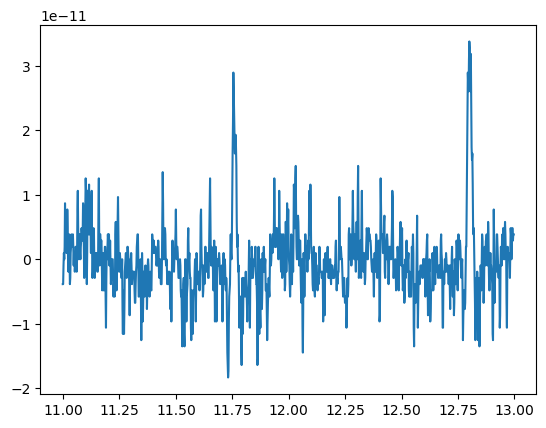

In [18]:
x = raw_selection[1]
y = raw_selection[0].T
plt.plot(x, y)

## extracting channels by name

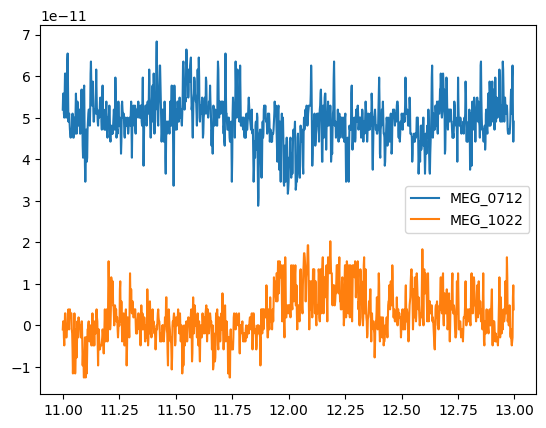

In [19]:
channel_names = ['MEG_0712', 'MEG_1022']
two_meg_chans = raw[channel_names, start_sample:stop_sample]
y_offset = np.array([5e-11, 0])  # just enough to separate the channel traces
x = two_meg_chans[1]
y = two_meg_chans[0].T + y_offset
lines = plt.plot(x, y)
plt.legend(lines, channel_names)

## extracting channels by type

In [20]:
eeg_channel_indices = mne.pick_types(raw.info, meg=False, eeg=True)
eeg_data, times = raw[eeg_channel_indices]
print(eeg_data.shape)

(58, 36038)


In [21]:
data = raw.get_data()
print(data.shape)

(376, 36038)


In [22]:
data, times = raw.get_data(return_times=True)
print(data.shape)
print(times.shape)

(376, 36038)
(36038,)


In [23]:
first_channel_data = raw.get_data(picks=0)
eeg_and_eog_data = raw.get_data(picks=['eeg', 'eog'])
two_meg_chans_data = raw.get_data(picks=['MEG_0712', 'MEG_1022'],
                                  start=1000, stop=2000)

print(first_channel_data.shape)
print(eeg_and_eog_data.shape)
print(two_meg_chans_data.shape)

(1, 36038)
(61, 36038)
(2, 1000)


# Events

In [24]:
import os
import numpy as np
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
raw.crop(tmax=60).load_data()

Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

In [25]:
events = mne.find_events(raw, stim_channel='STI 014')

86 events found
Event IDs: [ 1  2  3  4  5 32]


In [26]:
sample_data_events_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                       'sample_audvis_raw-eve.fif')
events_from_file = mne.read_events(sample_data_events_file)
assert np.array_equal(events, events_from_file[:len(events)])

In [27]:
mne.find_events(raw, stim_channel='STI 014')

86 events found
Event IDs: [ 1  2  3  4  5 32]


array([[27977,     0,     2],
       [28345,     0,     3],
       [28771,     0,     1],
       [29219,     0,     4],
       [29652,     0,     2],
       [30025,     0,     3],
       [30450,     0,     1],
       [30839,     0,     4],
       [31240,     0,     2],
       [31665,     0,     3],
       [32101,     0,     1],
       [32519,     0,     4],
       [32935,     0,     2],
       [33325,     0,     3],
       [33712,     0,     1],
       [34089,     0,     5],
       [34532,     0,     2],
       [34649,     0,    32],
       [34956,     0,     3],
       [35428,     0,     1],
       [35850,     0,     4],
       [36211,     0,     2],
       [36576,     0,     3],
       [37007,     0,     1],
       [37460,     0,     4],
       [37910,     0,     2],
       [38326,     0,     3],
       [38711,     0,     1],
       [39130,     0,     4],
       [39563,     0,     2],
       [39926,     0,     3],
       [40405,     0,     1],
       [40880,     0,     4],
       [41

In [28]:
# exclude event
events_no_button = mne.pick_events(events, exclude=32)

In [29]:
merged_events = mne.merge_events(events, [1, 2, 3], 1)
print(np.unique(merged_events[:, -1]))

[ 1  4  5 32]


In [30]:
event_dict = {'auditory/left': 1, 'auditory/right': 2, 'visual/left': 3,
              'visual/right': 4, 'smiley': 5, 'buttonpress': 32}

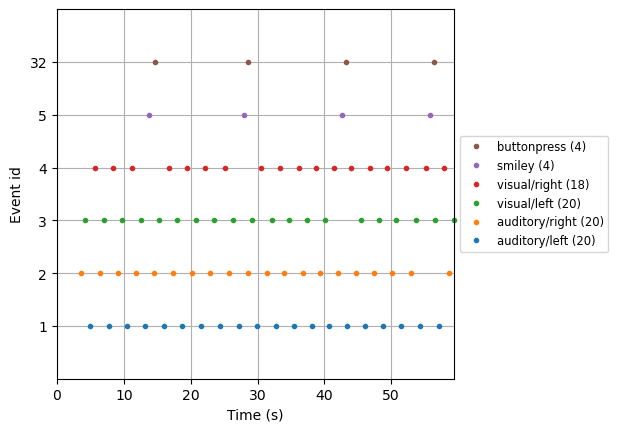

In [31]:
fig = mne.viz.plot_events(events, sfreq=raw.info['sfreq'],
                          first_samp=raw.first_samp, event_id=event_dict)
fig.subplots_adjust(right=0.7)  # make room for legend

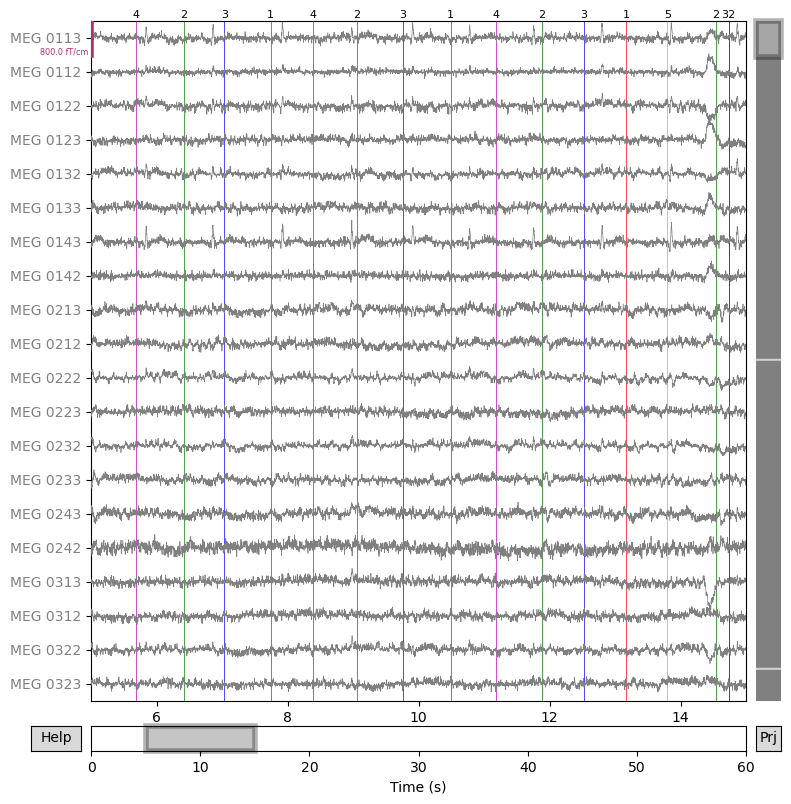

In [33]:
raw.plot(events=events, start=5, duration=10, color='gray',
         event_color={1: 'r', 2: 'g', 3: 'b', 4: 'm', 5: 'y', 32: 'k'});

# annotating continous data

In [34]:
import os
from datetime import timedelta
import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False)
raw.crop(tmax=60).load_data()

Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

In [35]:
my_annot = mne.Annotations(onset=[3, 5, 7],  # in seconds
                           duration=[1, 0.5, 0.25],  # in seconds, too
                           description=['AAA', 'BBB', 'CCC'])
print(my_annot)

<Annotations | 3 segments: AAA (1), BBB (1), CCC (1)>


In [36]:
raw.set_annotations(my_annot)
print(raw.annotations)

# convert meas_date (a tuple of seconds, microseconds) into a float:
meas_date = raw.info['meas_date']
orig_time = raw.annotations.orig_time
print(meas_date == orig_time)

<Annotations | 3 segments: AAA (1), BBB (1), CCC (1)>
True


In [37]:
time_of_first_sample = raw.first_samp / raw.info['sfreq']
print(my_annot.onset + time_of_first_sample)
print(raw.annotations.onset)

[45.95597083 47.95597083 49.95597083]
[45.95597083 47.95597083 49.95597083]


In [38]:
time_format = '%Y-%m-%d %H:%M:%S.%f'
new_orig_time = (meas_date + timedelta(seconds=50)).strftime(time_format)
print(new_orig_time)

later_annot = mne.Annotations(onset=[3, 5, 7],
                              duration=[1, 0.5, 0.25],
                              description=['DDD', 'EEE', 'FFF'],
                              orig_time=new_orig_time)

raw2 = raw.copy().set_annotations(later_annot)
print(later_annot.onset)
print(raw2.annotations.onset)

2002-12-03 19:02:00.720100
[3. 5. 7.]
[53. 55. 57.]


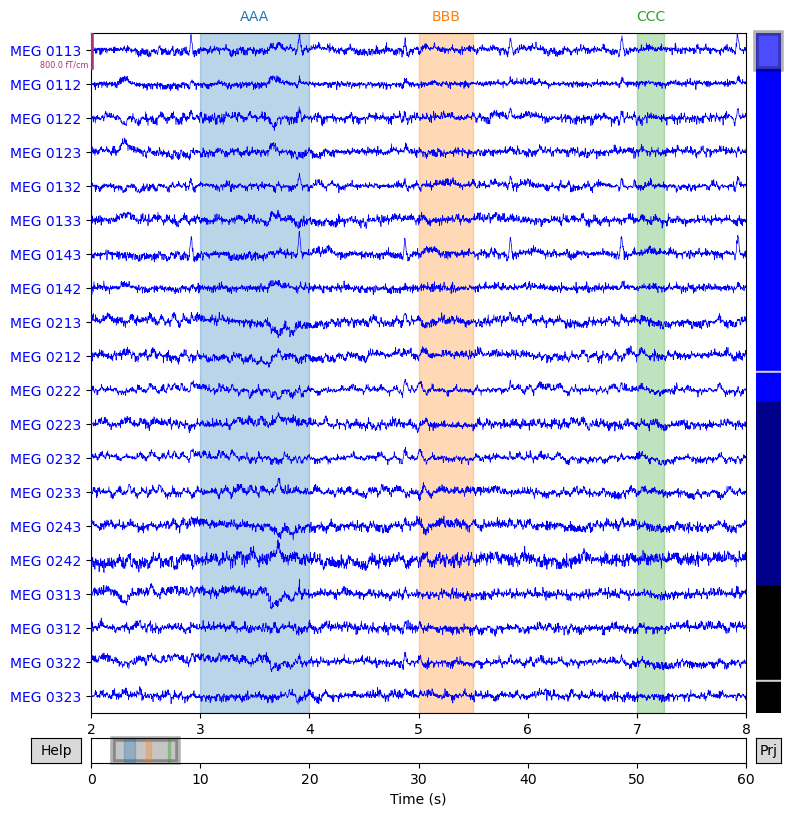

In [39]:
fig = raw.plot(start=2, duration=6);

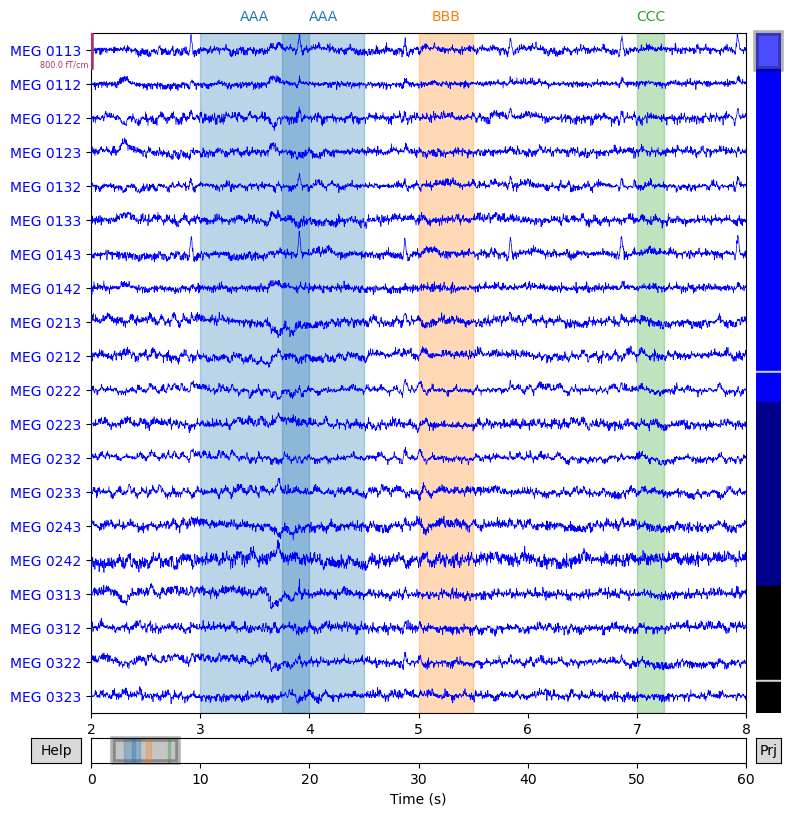

In [41]:
new_annot = mne.Annotations(onset=3.75, duration=0.75, description='AAA')
raw.set_annotations(my_annot + new_annot)
raw.plot(start=2, duration=6);

In [42]:
for ann in raw.annotations:
    descr = ann['description']
    start = ann['onset']
    end = ann['onset'] + ann['duration']
    print("'{}' goes from {} to {}".format(descr, start, end))

'AAA' goes from 45.95597082905339 to 46.95597082905339
'AAA' goes from 46.70597082905339 to 47.45597082905339
'BBB' goes from 47.95597082905339 to 48.45597082905339
'CCC' goes from 49.95597082905339 to 50.20597082905339


# plot raw objects

In [43]:
import os

import mne

sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
raw.crop(tmax=60).load_data()

Opening raw data file /Users/DanDan/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

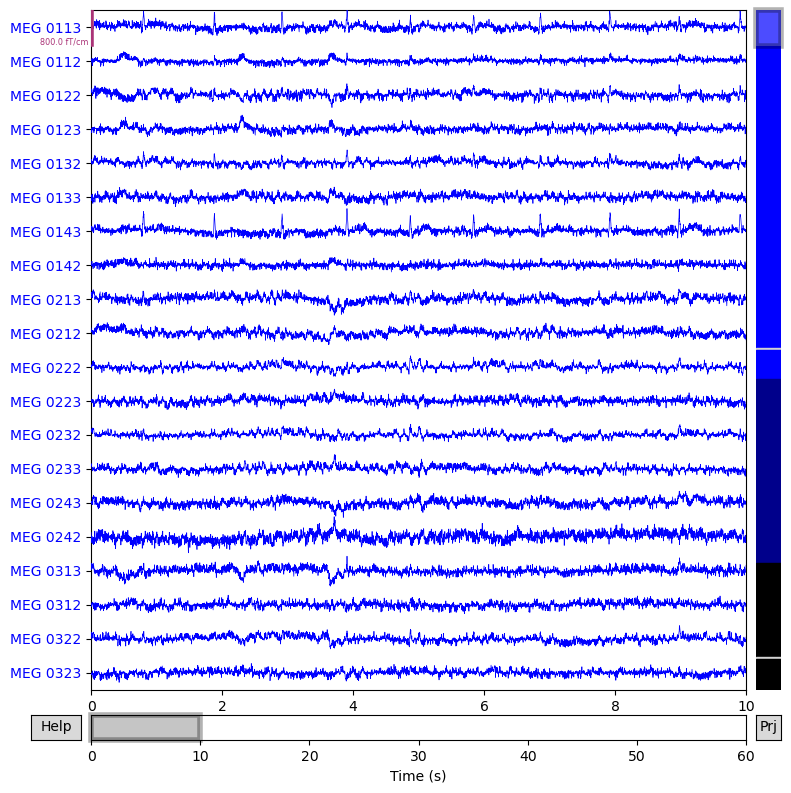

In [44]:
raw.plot();

/Users/DanDan/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


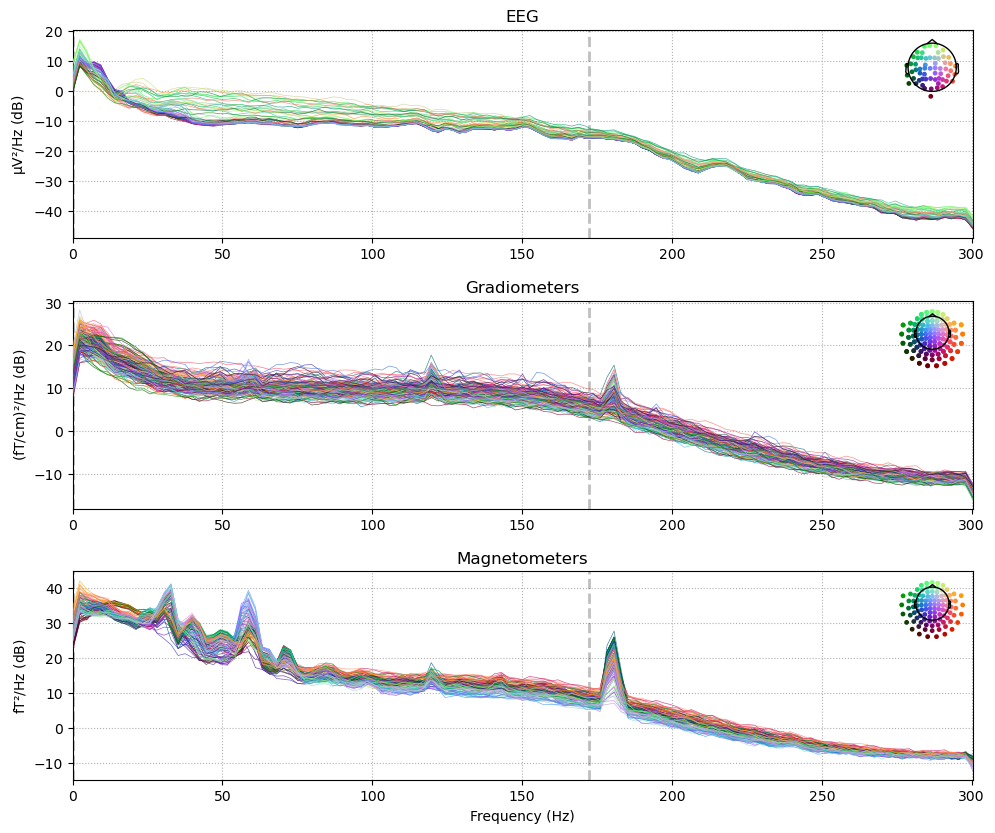

In [49]:
spectrum = raw.compute_psd()
spectrum.plot()   # EEG, GRAD, MAG all channels

Effective window size : 0.426 (s)


/Users/DanDan/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


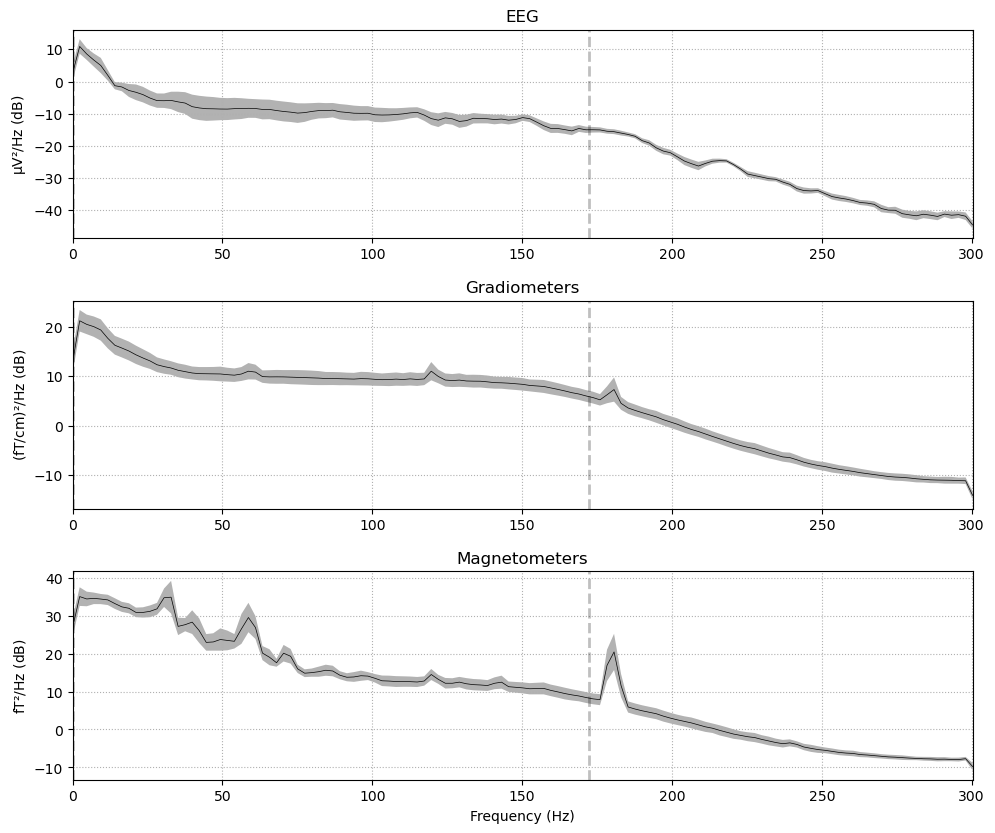

In [46]:
spectrum.plot(average=True)  # average 

/Users/DanDan/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


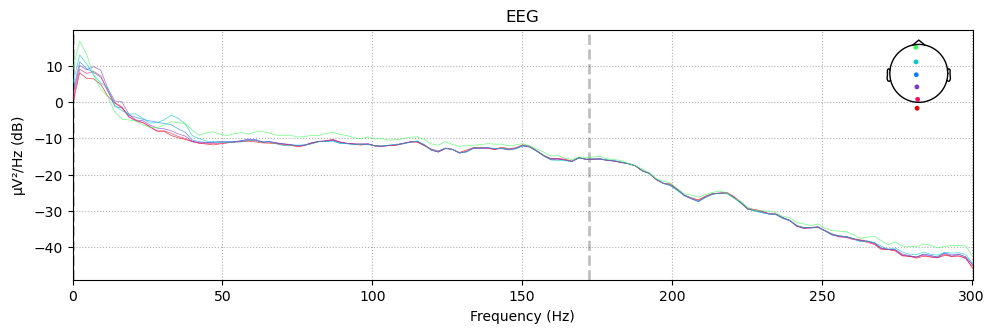

In [50]:
# also can select sepcifc channel in each type
midline = ['EEG 002', 'EEG 012', 'EEG 030', 'EEG 048', 'EEG 058', 'EEG 060']
spectrum.plot(picks=midline)

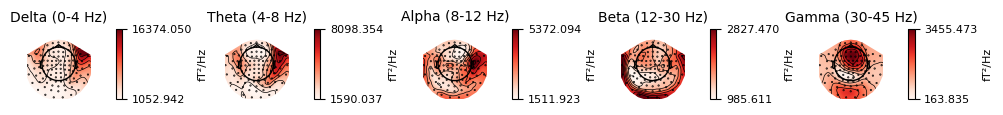

In [52]:
spectrum.plot_topomap();

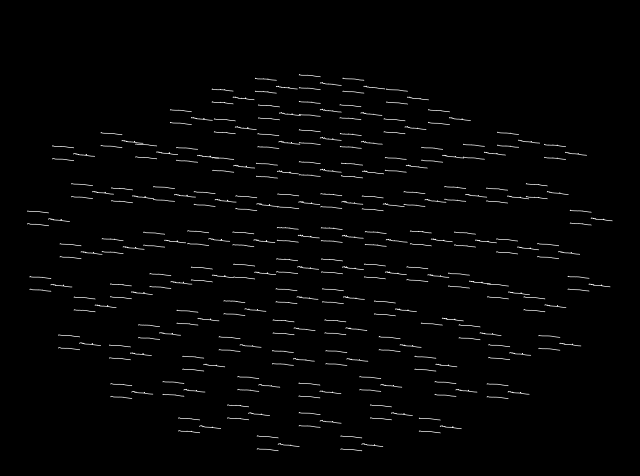

In [53]:
spectrum.plot_topo();

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


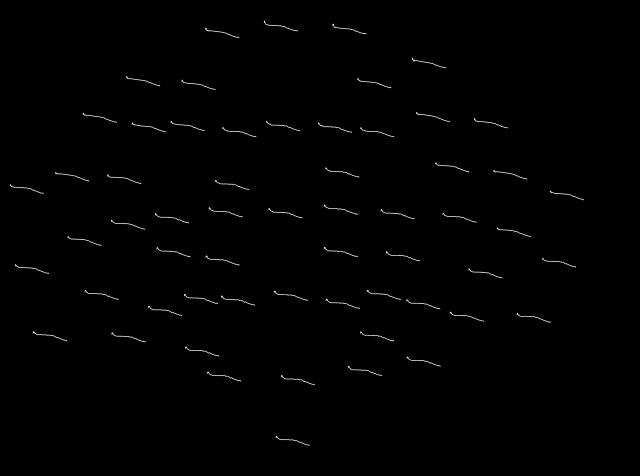

In [55]:
spectrum.pick('eeg').plot_topo();

# plotting sensor locations from raw

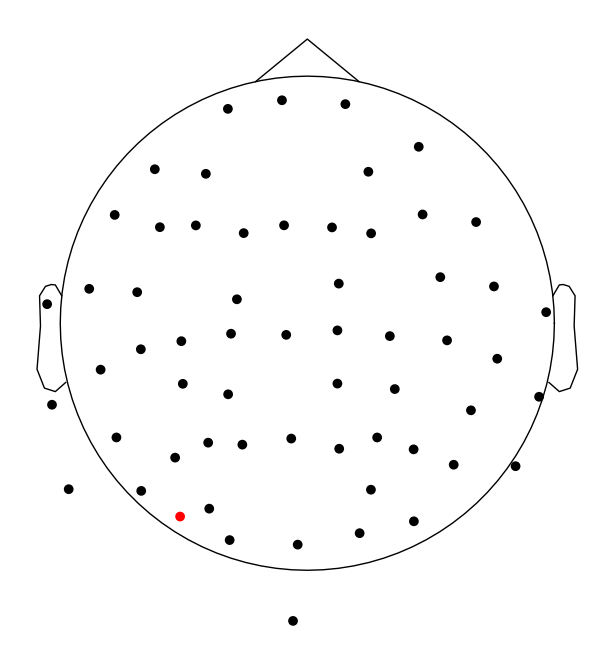

In [57]:
raw.plot_sensors(ch_type='eeg');